<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IHC-plots-for-cells" data-toc-modified-id="IHC-plots-for-cells-1">IHC plots for cells</a></span></li><li><span><a href="#Violin-plots-for-cells-H-score" data-toc-modified-id="Violin-plots-for-cells-H-score-2">Violin plots for cells H score</a></span></li><li><span><a href="#related-to-numbers-in-text" data-toc-modified-id="related-to-numbers-in-text-3">related to numbers in text</a></span></li></ul></div>

In [1]:
library(ggplot2)

library(reshape2)

In [2]:
mytheme <- 
#axis
theme(axis.title = element_text(size = 25),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(size = 25, angle = 45, hjust = 1),
      axis.text.y = element_text(size = 25)) +
#plot
theme(plot.title = element_text(size = 25),
    panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      plot.margin = unit(c(0.2,0,0,0),"cm")) +
#legend
theme(legend.key = element_rect(fill = "white", colour = "white"),
      legend.position = "right") 

In [36]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD1/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD1/Data/"

plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# IHC plots for cells

Load raw scoring spreadsheets

In [37]:
cd4ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD4_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

cd8ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD8_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

cd19ihc_raw <- read.csv(paste0(datapath, "IHC/Alberto/CD19_raw.csv"),
                  header = TRUE, stringsAsFactors = F, na.strings = "")

Clean up column ID

In [38]:
cd4ihc_raw$ptid <- gsub(" .*", "", cd4ihc_raw$ID)
cd8ihc_raw$ptid <- gsub(" .*", "", cd8ihc_raw$ID)
cd19ihc_raw$ptid <- gsub(" .*", "", cd19ihc_raw$ID)

Load aggregated files

In [39]:
cd4ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD4.csv"),
                  header = TRUE, stringsAsFactors = F)

cd8ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD8.csv"),
                  header = TRUE, stringsAsFactors = F)

cd19ihc <- read.csv(paste0(datapath, "IHC/Alberto/agg.df.CD19.csv"),
                  header = TRUE, stringsAsFactors = F)

In [40]:
colnames(cd4ihc)[colnames(cd4ihc) == "block"] <- "ptid"
colnames(cd8ihc)[colnames(cd8ihc) == "block"] <- "ptid"
colnames(cd19ihc)[colnames(cd19ihc) == "block"] <- "ptid"

Clean the raw csv files using IDs from aggregated files. Convert NAs to zeros

In [41]:
cd4ihc_raw_clean <- cd4ihc_raw[cd4ihc_raw$ptid %in% cd4ihc$ptid,]
cd8ihc_raw_clean <- cd8ihc_raw[cd8ihc_raw$ptid %in% cd8ihc$ptid,]
cd19ihc_raw_clean <- cd19ihc_raw[cd19ihc_raw$ptid %in% cd19ihc$ptid,]

In [42]:
cd4ihc_raw_clean$X.[is.na(cd4ihc_raw_clean$X.)] <- 0
cd4ihc_raw_clean$Intensity[is.na(cd4ihc_raw_clean$Intensity)] <- 0

In [43]:
cd8ihc_raw_clean$X.[is.na(cd8ihc_raw_clean$X.)] <- 0
cd8ihc_raw_clean$Intensity[is.na(cd8ihc_raw_clean$Intensity)] <- 0

In [44]:
cd19ihc_raw_clean$X.[is.na(cd19ihc_raw_clean$X.)] <- 0
cd19ihc_raw_clean$Intensity[is.na(cd19ihc_raw_clean$Intensity)] <- 0

H score for comparison with aggregated file

In [45]:
cd4ihc_raw_clean$Hscore <- cd4ihc_raw_clean$Intensity * cd4ihc_raw_clean$X.
cd8ihc_raw_clean$Hscore <- cd8ihc_raw_clean$Intensity * cd8ihc_raw_clean$X.
cd19ihc_raw_clean$Hscore <- cd19ihc_raw_clean$Intensity * cd19ihc_raw_clean$X.

Aggregate by mean

In [46]:
aggcd4 <- aggregate(cd4ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd4ihc_raw_clean$ptid),
         FUN = mean)
colnames(aggcd4)[colnames(aggcd4) == "Group.1"] <- "ptid"

In [47]:
aggcd8 <- aggregate(cd8ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd8ihc_raw_clean$ptid),
         FUN = mean)
colnames(aggcd8)[colnames(aggcd8) == "Group.1"] <- "ptid"

In [48]:
aggcd4 <- aggregate(cd4ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd4ihc_raw_clean$ptid),
         FUN = mean)
colnames(aggcd4)[colnames(aggcd4) == "Group.1"] <- "ptid"

In [49]:
aggcd19 <- aggregate(cd19ihc_raw_clean[, c("X.","Intensity" ,"Hscore")],
         by = list(cd19ihc_raw_clean$ptid),
         FUN = mean)
colnames(aggcd19)[colnames(aggcd19) == "Group.1"] <- "ptid"

In [50]:
cd4_merge <- merge(aggcd4, cd4ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")

cd8_merge <- merge(aggcd8, cd8ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")

cd19_merge <- merge(aggcd19, cd19ihc[, c("ptid", "type", "Subtype", "H.score")], by = "ptid")

In [51]:
cd4ihc_subset <- cd4_merge[cd4_merge$type != "Wilms" &
                        cd4_merge$type != "Hepatoblastoma",]
cd8ihc_subset <- cd8_merge[cd8_merge$type != "Wilms" &
                        cd8_merge$type != "Hepatoblastoma",]
cd19ihc_subset <- cd19_merge[cd19_merge$type != "Wilms" &
                        cd19_merge$type != "Hepatoblastoma",]

In [52]:
cd8ihc_subset$type <- as.character(cd8ihc_subset$type)
cd4ihc_subset$type <- as.character(cd4ihc_subset$type)
cd19ihc_subset$type <- as.character(cd19ihc_subset$type)

In [53]:
cd4ihc_subset$type[grepl("NBL", cd4ihc_subset$Subtype)] <- "NBL"
cd8ihc_subset$type[grepl("NBL", cd8ihc_subset$Subtype)] <- "NBL"
cd19ihc_subset$type[grepl("NBL", cd19ihc_subset$Subtype)] <- "NBL"

# Violin plots for cells H score

In [54]:
head(cd4ihc_subset)

,ptid,X.,Intensity,Hscore,type,Subtype,H.score
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
5,PALHHT,0,0,0,NBL,NBL stage 4,0
7,PALNFP,0,0,0,NBL,NBL stage 3,0
9,PALTAL,0,0,0,NBL,NBL stage 4,0
10,PALTLX,0,0,0,NBL,NBL stage 3,0
11,PALWKV,0,0,0,NBL,NBL stage 3,0
12,PAMHLN,0,0,0,NBL,NBL stage 3,0


In [85]:
plotcd4 <- ggplot() +
geom_boxplot(data = cd4ihc_subset, 
                   aes(x = type ,y = H.score), 
            size = 0.5, fill = "light grey") +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      legend.position = "bottom") +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm"))+ 
scale_y_continuous(breaks = seq(0,30, by = 5)) +
labs(y = "H score CD4")

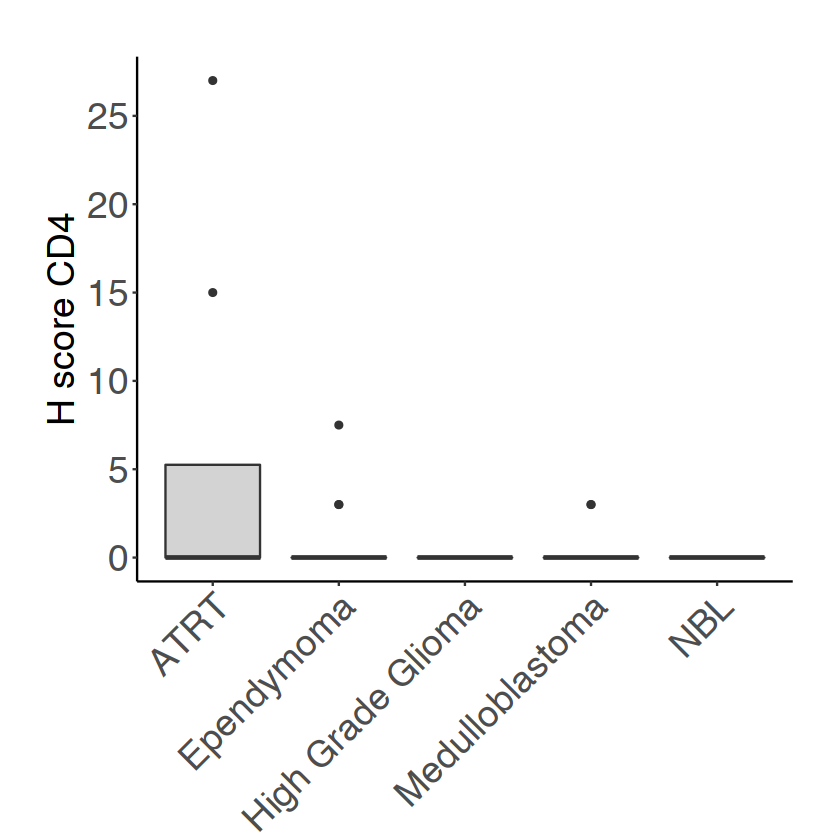

In [86]:
violinplotcd4

In [87]:
plotcd8 <- ggplot() +
geom_boxplot(data = cd8ihc_subset, 
                   aes(x = type ,y = H.score), 
            size = 0.5, fill = "light grey") +

theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      legend.position = "bottom") +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm"))+ 
scale_y_continuous(breaks = seq(0,60, by = 10)) +
labs(y = "H score CD8")

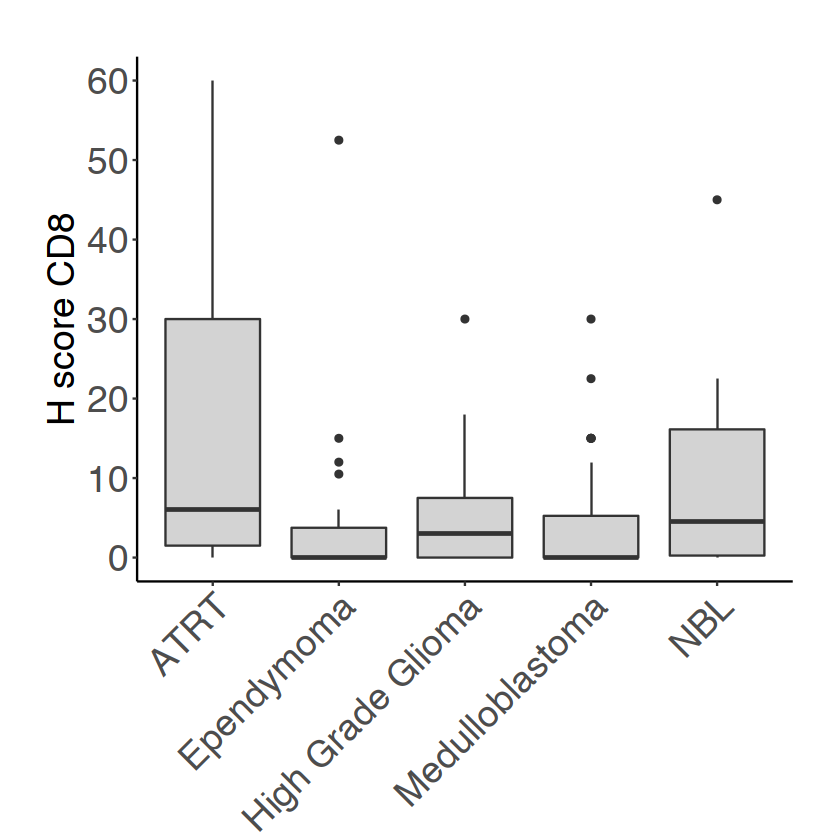

In [88]:
plotcd8

In [89]:
plotcd19 <- ggplot() +
geom_boxplot(data = cd19ihc_subset, 
                   aes(x = type ,y = H.score), 
            size = 0.5, fill = "light grey") +

theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22), 
      legend.position = "bottom") +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      plot.margin = unit(c(1.2,1,0,1),"cm"))+ 
#scale_y_continuous(breaks = seq(0,50, by = 10)) +
labs(y = "H score CD19")

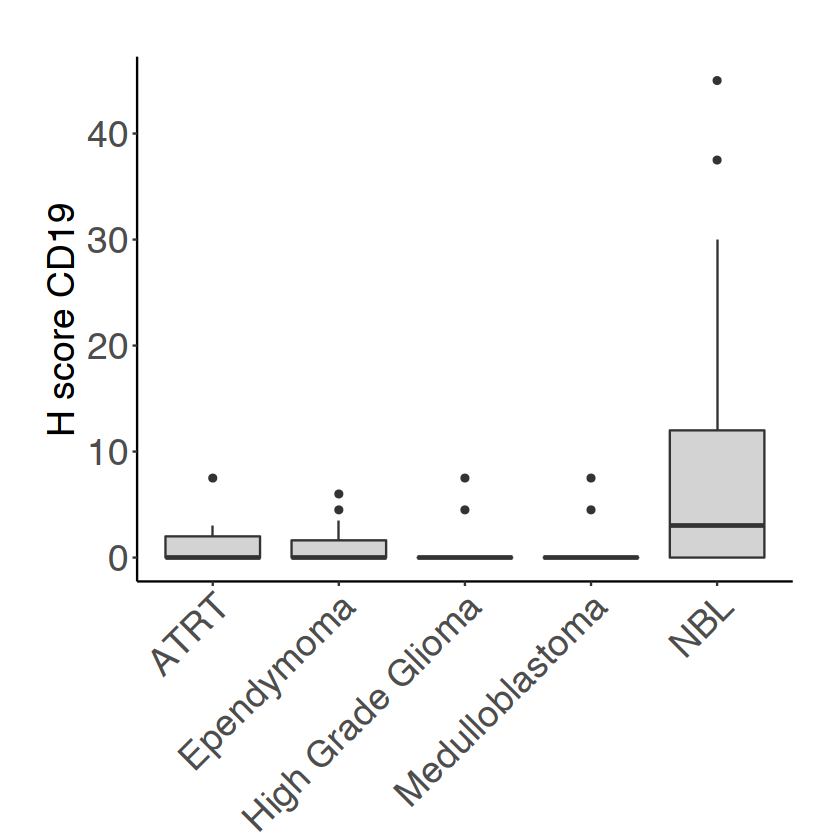

In [90]:
plotcd19

In [91]:

    pdf(file = paste0(plotpath,"CD19_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd19)
    dev.off()


pdf 
  2

In [92]:

    pdf(file = paste0(plotpath,"CD8_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd8)
    dev.off()


pdf 
  2

In [93]:
    pdf(file = paste0(plotpath,"CD4_H_plot.pdf"),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(plotcd4)
    dev.off()


pdf 
  2